In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

url = 'https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" media="all" rel="stylesheet"/><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-217d4f9c8e70.css" media="all" rel="stylesheet"/><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/assets/dark_dimmed-0adfa28f0e68.c

In [2]:
table1 = soup.find('table', attrs={"class": "js-csv-data csv-data js-file-line-container"})
table1

<table class="js-csv-data csv-data js-file-line-container">
<thead>
<tr class="js-file-line" id="LC1">
<td class="blob-num js-line-number" data-line-number="1" id="L1"></td>
<th>CustomerID</th>
<th>Genre</th>
<th>Age</th>
<th>Annual Income (k$)</th>
<th>Spending Score (1-100)</th>
</tr>
</thead>
<tbody>
<tr class="js-file-line" id="LC2">
<td class="blob-num js-line-number" data-line-number="2" id="L2"></td>
<td>0001</td>
<td>Male</td>
<td>19</td>
<td>15</td>
<td>39</td>
</tr>
<tr class="js-file-line" id="LC3">
<td class="blob-num js-line-number" data-line-number="3" id="L3"></td>
<td>0002</td>
<td>Male</td>
<td>21</td>
<td>15</td>
<td>81</td>
</tr>
<tr class="js-file-line" id="LC4">
<td class="blob-num js-line-number" data-line-number="4" id="L4"></td>
<td>0003</td>
<td>Female</td>
<td>20</td>
<td>16</td>
<td>6</td>
</tr>
<tr class="js-file-line" id="LC5">
<td class="blob-num js-line-number" data-line-number="5" id="L5"></td>
<td>0004</td>
<td>Female</td>
<td>23</td>
<td>16</td>
<td>77

In [3]:
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)
headers

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [4]:
df = pd.DataFrame(columns = headers)
df['CustomerID'] = '1'
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [5]:
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    row = row[1:]
    length = len(df)
    df.loc[length] = row

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0001,Male,19,15,39
1,0002,Male,21,15,81
2,0003,Female,20,16,6
3,0004,Female,23,16,77
4,0005,Female,31,17,40
...,...,...,...,...,...
195,0196,Female,35,120,79
196,0197,Female,45,126,28
197,0198,Male,32,126,74
198,0199,Male,32,137,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    object
 3   Annual Income (k$)      200 non-null    object
 4   Spending Score (1-100)  200 non-null    object
dtypes: object(5)
memory usage: 9.4+ KB


In [8]:
df[['Age', 'Annual Income (k$)','Spending Score (1-100)']] = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].astype(int)

In [9]:
df.duplicated().sum()

0

<AxesSubplot:>

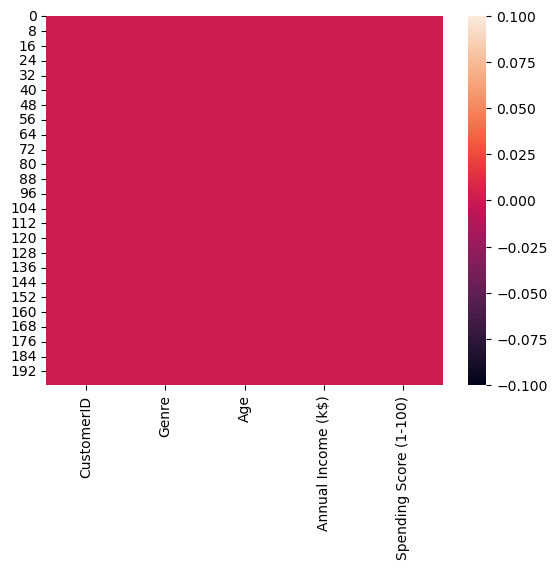

In [10]:
sns.heatmap(data = df.isnull())

In [11]:
df_copy = df.copy(deep=True)

In [12]:
def delete_of_abnormal(ini_df):
    work_val = ini_df.copy()
    if work_val.dtypes!=np.object:
        Q1 = np.percentile(work_val, 25, interpolation = 'midpoint')
        Q3 = np.percentile(work_val, 75, interpolation = 'midpoint')
        IQR = Q3-Q1
        upper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
    return upper,lower

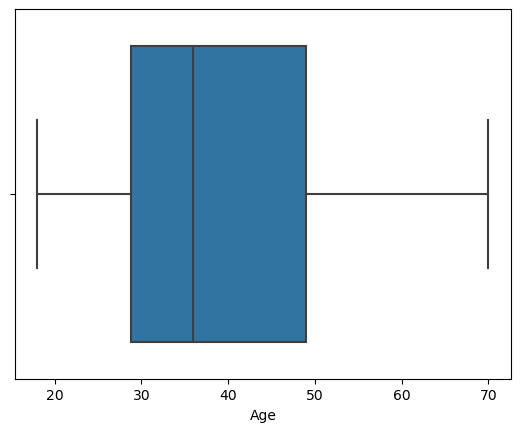

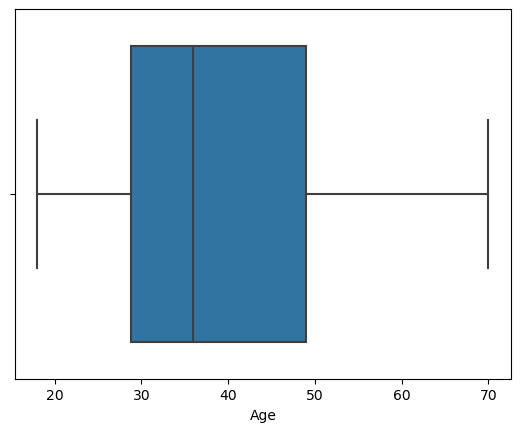

In [13]:
sns.boxplot(df['Age'])
plt.show()
upper,lower = delete_of_abnormal(df_copy['Age'])
df_copy = df_copy[~((df_copy['Age']>upper) | (df_copy['Age']<lower))]
sns.boxplot(df['Age'])
plt.show()

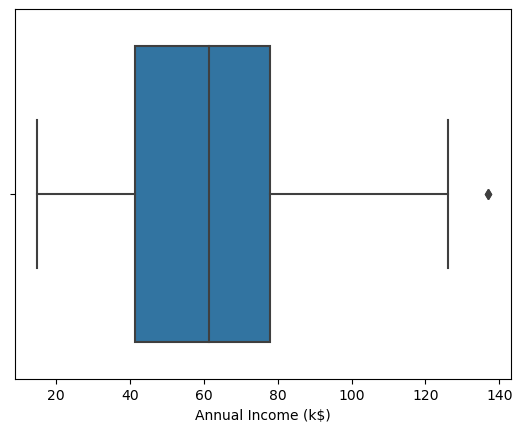

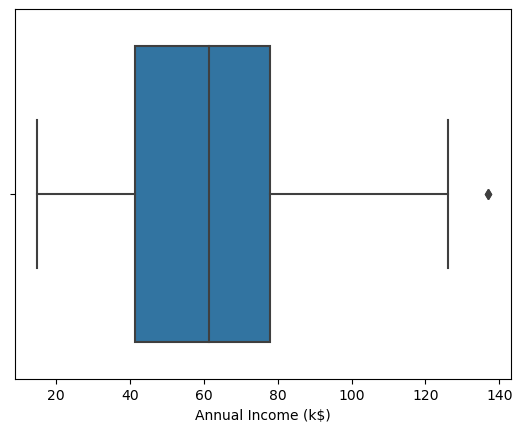

In [14]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()
upper,lower = delete_of_abnormal(df_copy['Annual Income (k$)'])
df_copy = df_copy[~((df_copy['Annual Income (k$)']>upper) | (df_copy['Annual Income (k$)']<lower))]
sns.boxplot(df['Annual Income (k$)'])
plt.show()

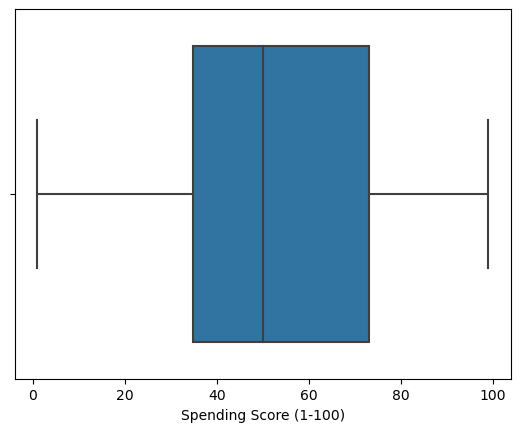

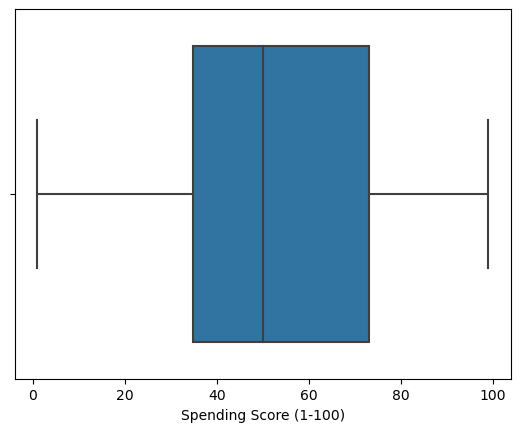

In [15]:
sns.boxplot(df['Spending Score (1-100)'])
plt.show()
upper,lower = delete_of_abnormal(df_copy['Spending Score (1-100)'])
df_copy = df_copy[~((df_copy['Spending Score (1-100)']>upper) | (df_copy['Spending Score (1-100)']<lower))]
sns.boxplot(df['Spending Score (1-100)'])
plt.show()

In [16]:
df_copy.drop(columns = 'CustomerID', inplace = True)
df_copy

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28


In [17]:
def encode(ini_df):
    results = ini_df.copy()
    encoders = {}
    for column in results.columns:
        if results.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            results[column] = encoders[column].fit_transform(results[column])
    return results,encoders

In [18]:
encoded_data,encoders=encode(df_copy)
encoded_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79
196,0,45,126,28


In [19]:
s_list = ['Age','Annual Income (k$)','Spending Score (1-100)']
def norm(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].min())/(x_std[column].max()-x_std[column].min())
    return x_std

In [20]:
norm(encoded_data)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.009009,0.051020
3,0,0.096154,0.009009,0.775510
4,0,0.250000,0.018018,0.397959
...,...,...,...,...
193,0,0.384615,0.882883,0.918367
194,0,0.557692,0.945946,0.153061
195,0,0.326923,0.945946,0.795918
196,0,0.519231,1.000000,0.275510


<AxesSubplot:>

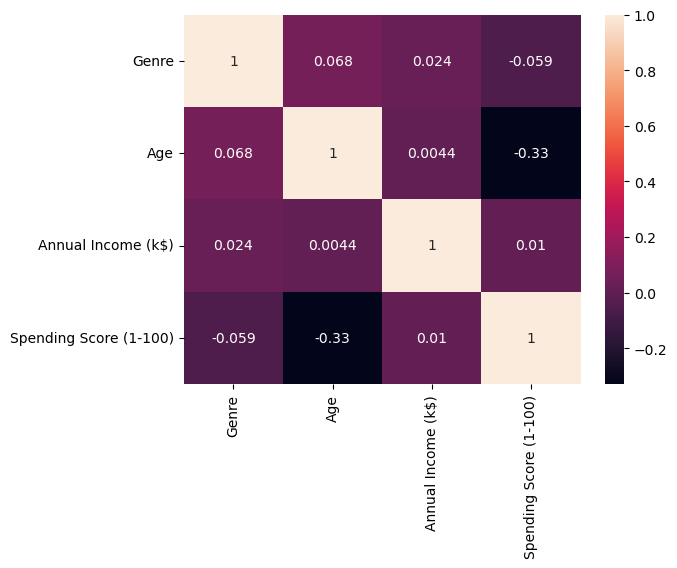

In [21]:
sns.heatmap(data = encoded_data.corr(), annot = True)

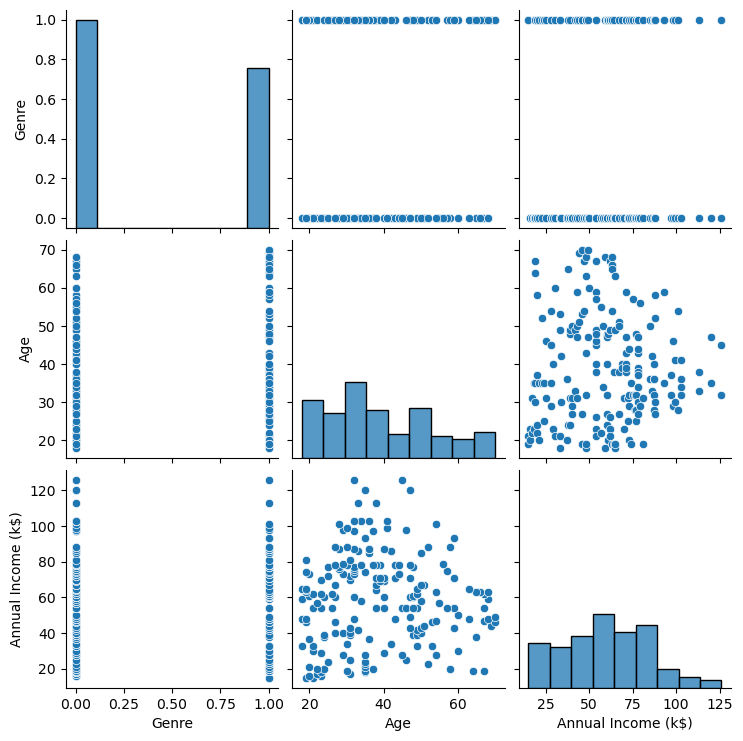

In [22]:
sns.pairplot(encoded_data, vars=encoded_data.columns[:-1])
plt.show()

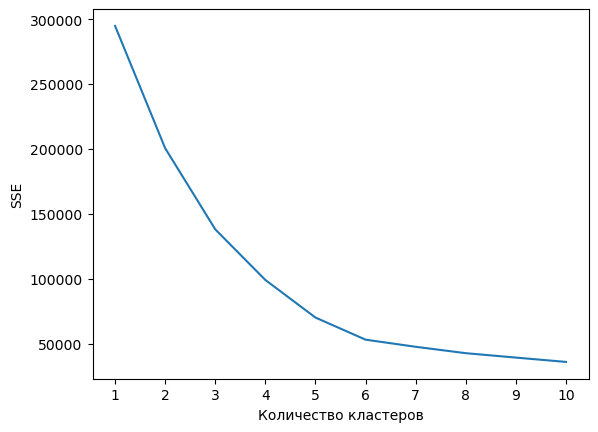

In [38]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(encoded_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.show()

[36043.247306859805]

NameError: name 'c6' is not defined

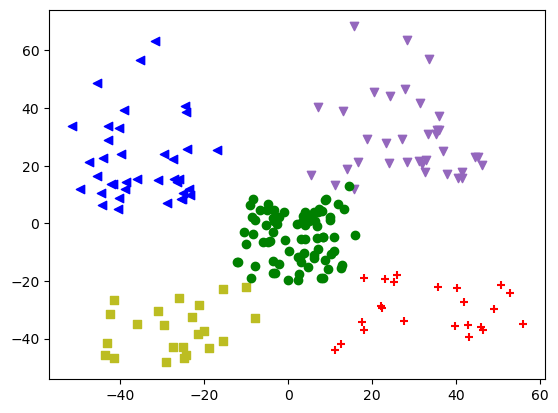

In [44]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
kmeans = KMeans(n_init = 300,n_clusters = 5)
kmeans.fit(encoded_data)

pca = PCA(n_components=2).fit(encoded_data)
pca_2d = pca.transform(encoded_data)

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker="<")
    elif kmeans.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#9467bd', marker="v")
    elif kmeans.labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#bcbd22', marker="s")
    elif kmeans.labels_[i] == -1:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#8c564b', marker='*')
        
            
plt.legend([c1, c2, c3, c4, c5, c6], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4' ,'Кластер 5', 'Шум'])
plt.show()

По моему идеально 0_0

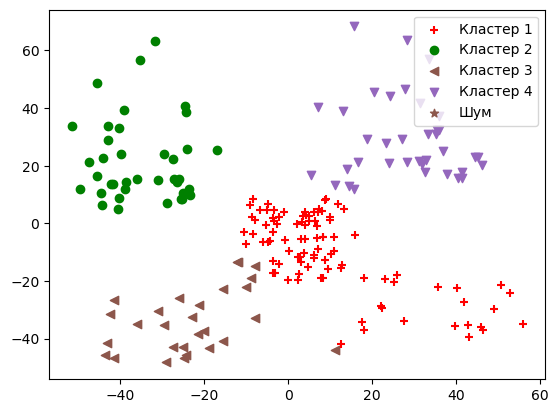

In [49]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
kmeans = KMeans(n_init = 300,n_clusters = 4)
kmeans.fit(encoded_data)

pca = PCA(n_components=2).fit(encoded_data)
pca_2d = pca.transform(encoded_data)

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#8c564b', marker="<")
    elif kmeans.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#9467bd', marker="v")
    elif kmeans.labels_[i] == -1:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

        
            
plt.legend([c1, c2, c3, c4, c5], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4' , 'Шум'])
plt.show()

Ну или так

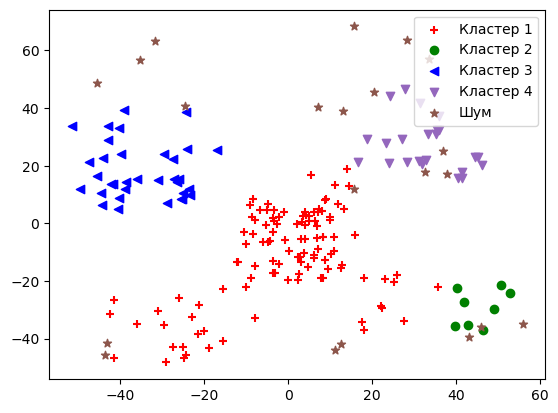

In [59]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 14, min_samples = 6)
dbscan.fit(encoded_data)

pca = PCA(n_components=2).fit(encoded_data)
pca_2d = pca.transform(encoded_data)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker="<")
    elif dbscan.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#9467bd', marker="v")
    elif dbscan.labels_[i] == -1:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#8c564b', marker='*')

plt.legend([c1, c2, c3, c4, c5], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4' , 'Шум'])
plt.show()

С dbscan'ом тяжело идёт

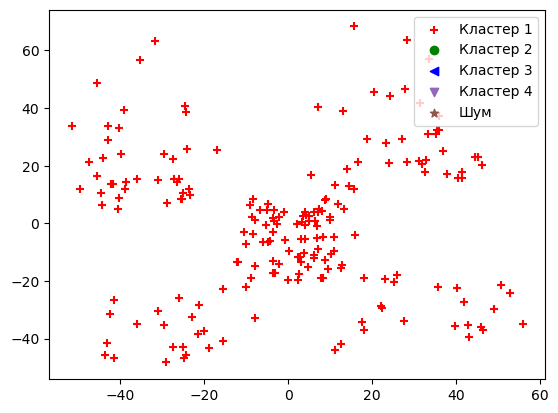

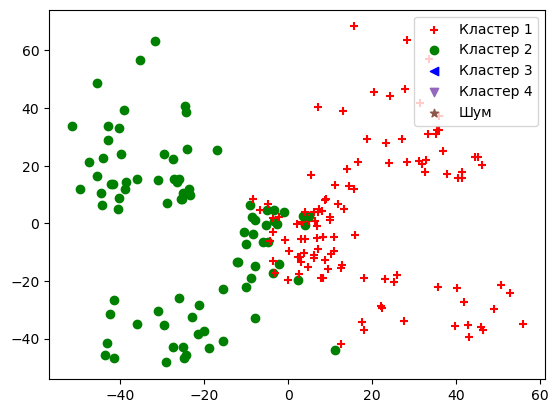

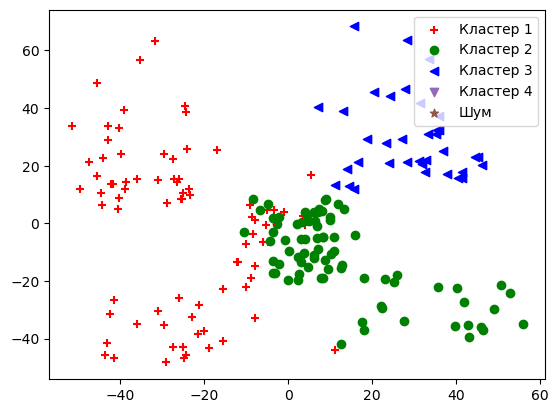

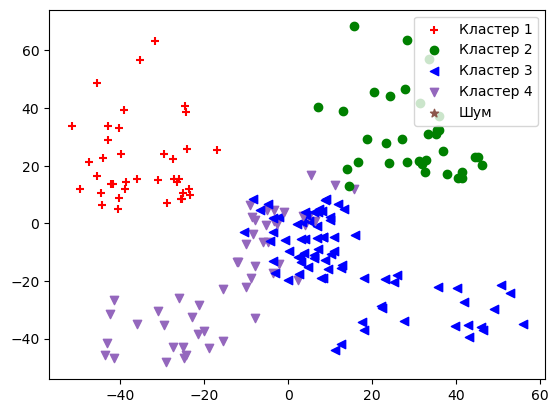

In [63]:
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture
for components in range(1,5):
    gm = GaussianMixture(n_components=components, random_state=0, n_init = 20).fit(encoded_data)
    gm.predict(encoded_data)

    pca = PCA(n_components=2).fit(encoded_data)
    pca_2d = pca.transform(encoded_data)
    
    
    for i in range(0, pca_2d.shape[0]):
        if gm.predict(encoded_data)[i] == 0:
            c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
        elif gm.predict(encoded_data)[i] == 1:
            c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
        elif gm.predict(encoded_data)[i] == 2:
            c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker="<")
        elif gm.predict(encoded_data)[i] == 3:
            c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#9467bd', marker="v")
        elif gm.predict(encoded_data)[i] == -1:
            c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#8c564b', marker='*')

    plt.legend([c1, c2, c3, c4, c5], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4' , 'Шум'])
    plt.show()

А тут кластеры задевают друг друга сильно

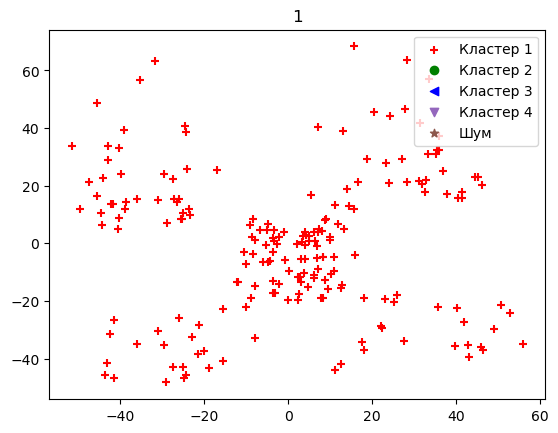

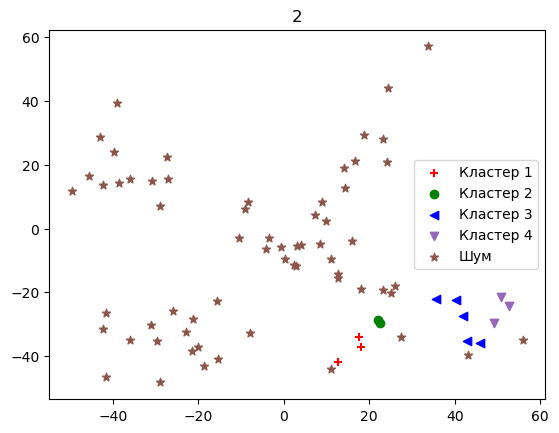

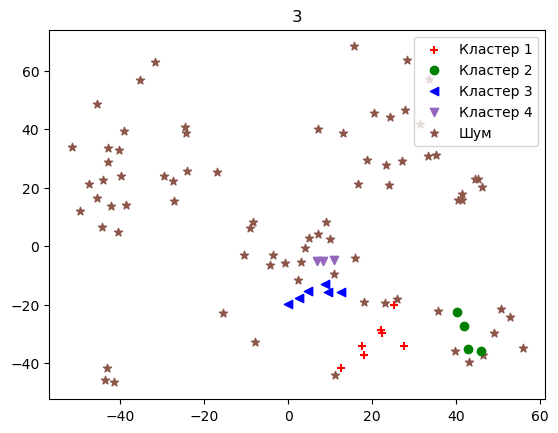

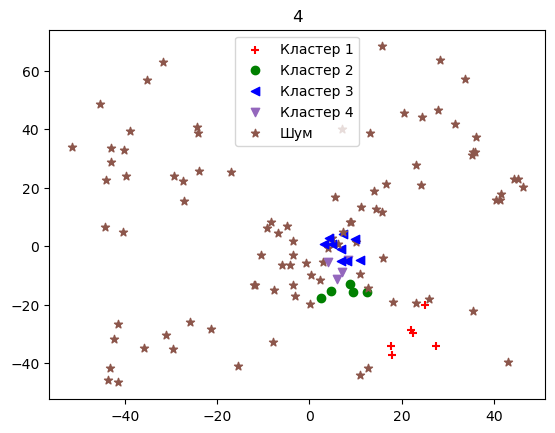

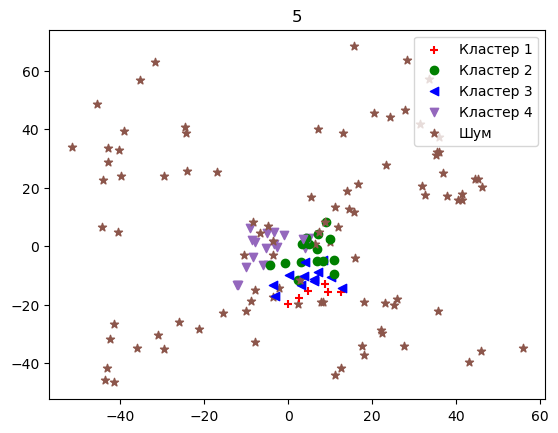

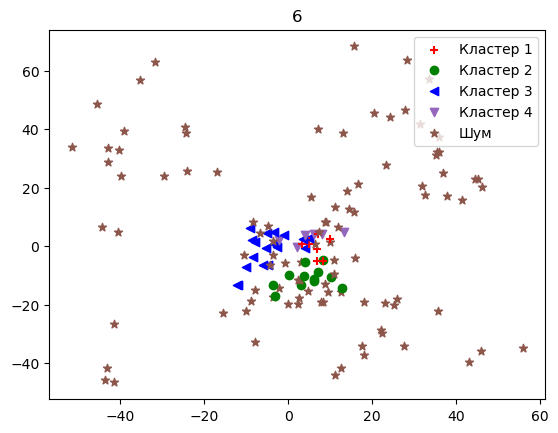

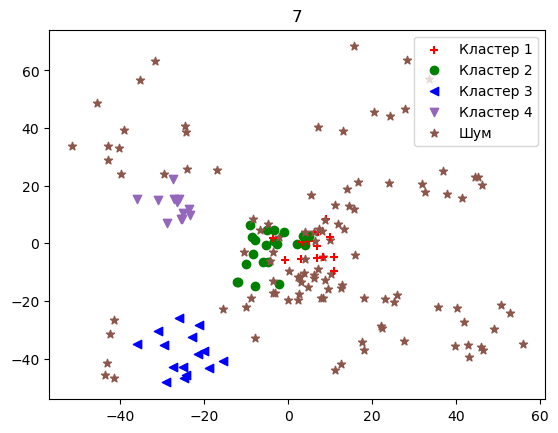

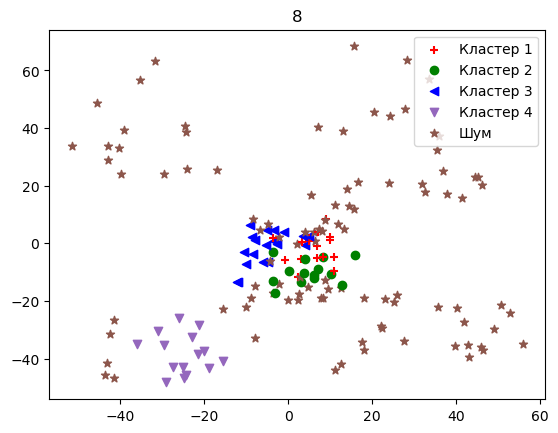

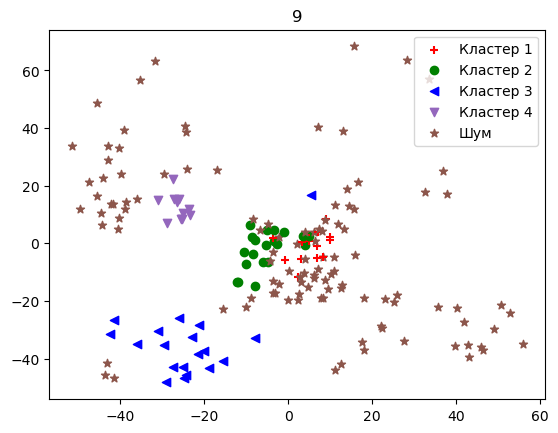

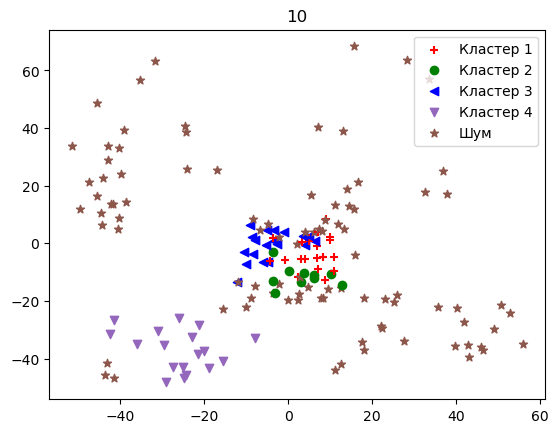

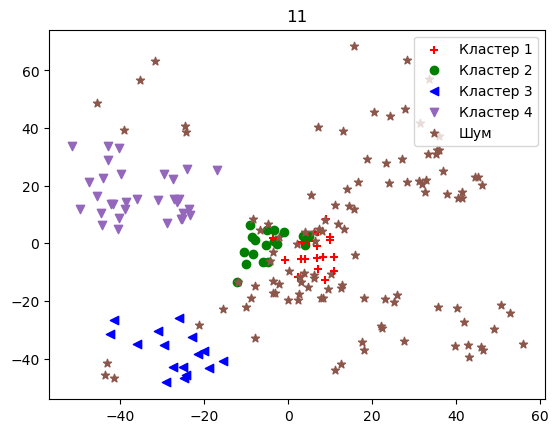

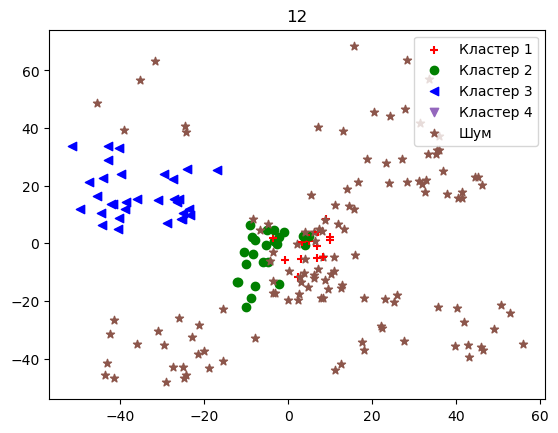

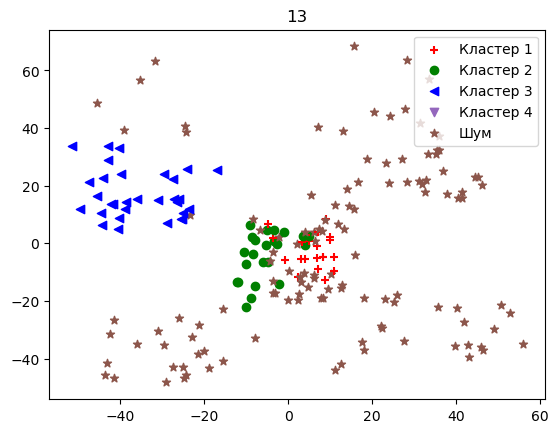

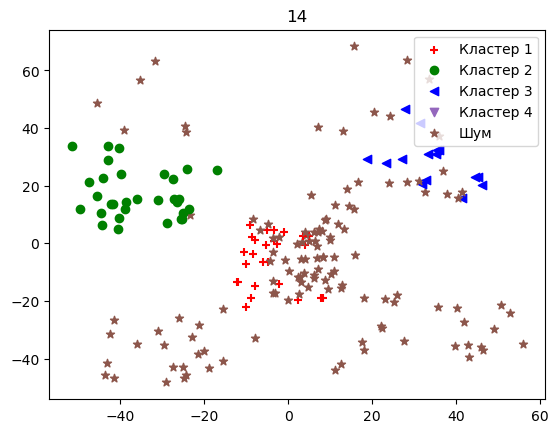

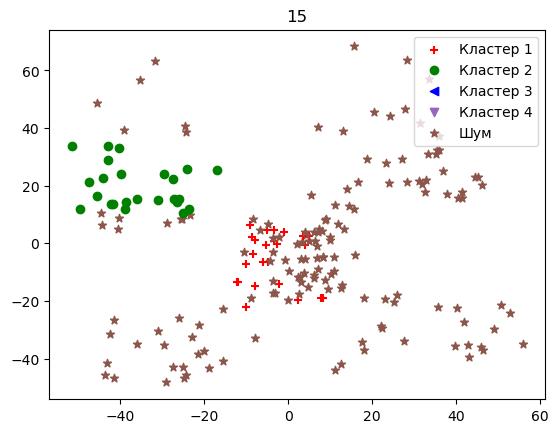

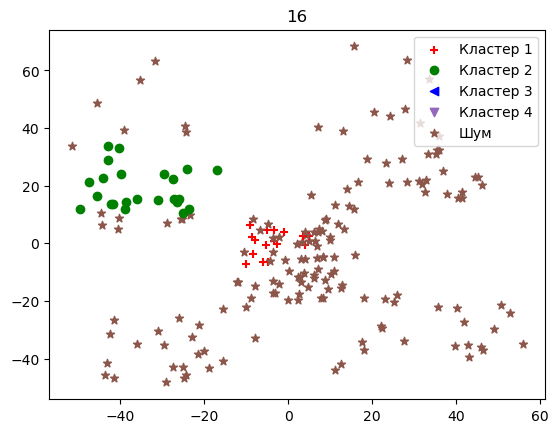

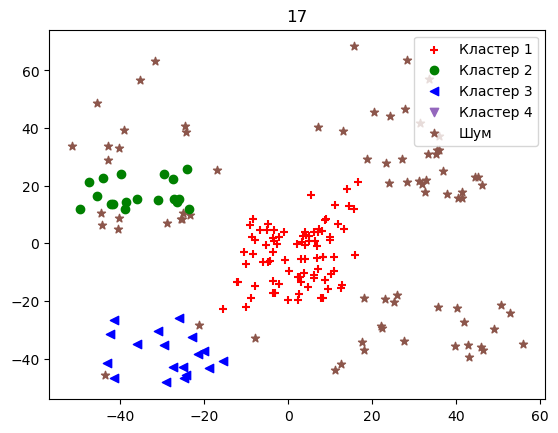

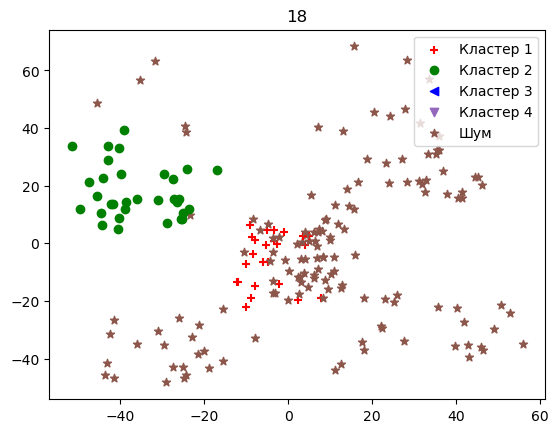

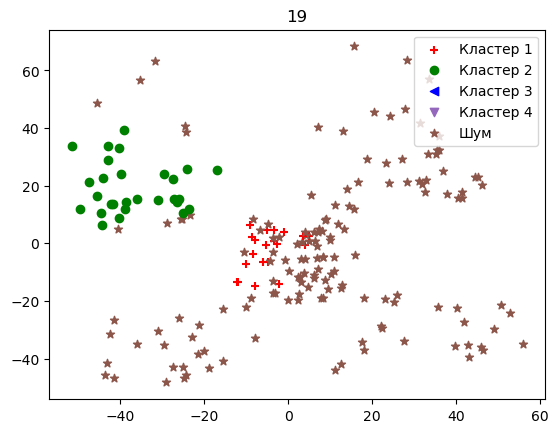

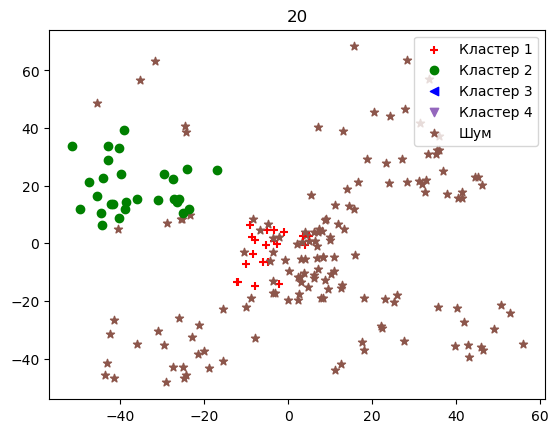

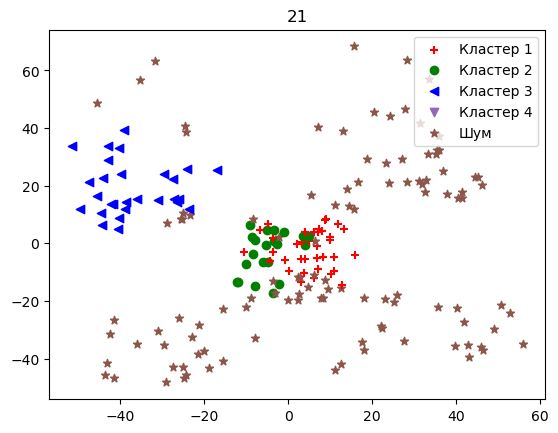

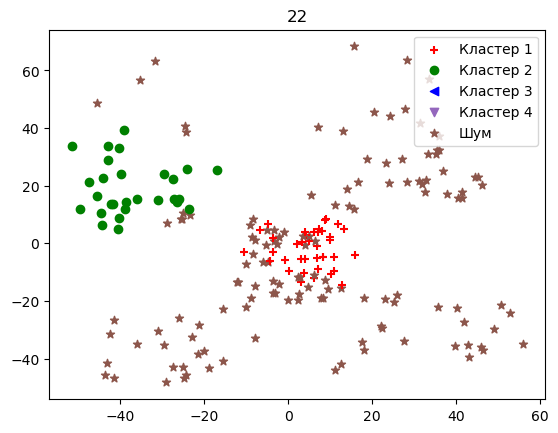

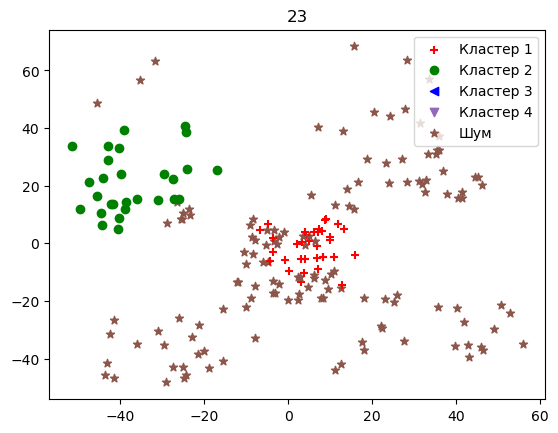

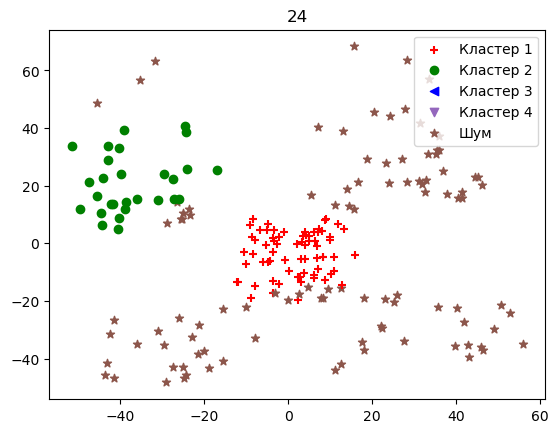

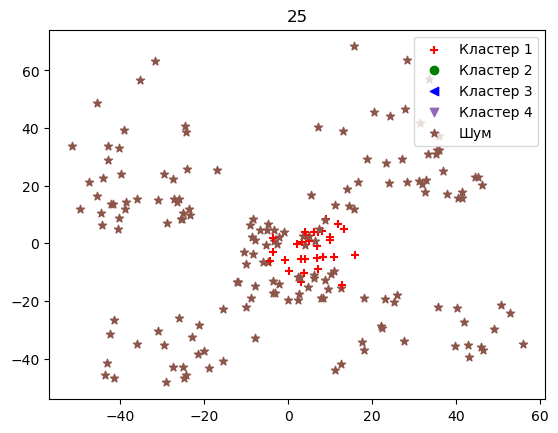

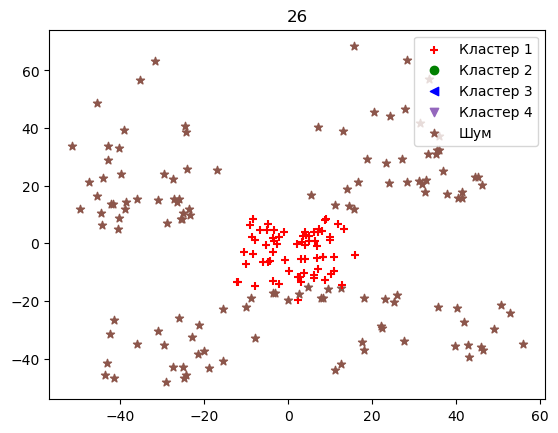

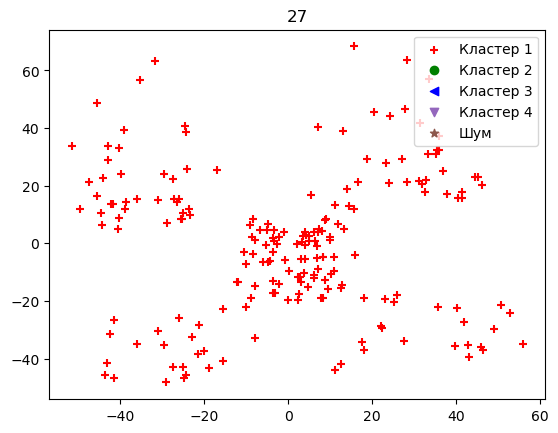

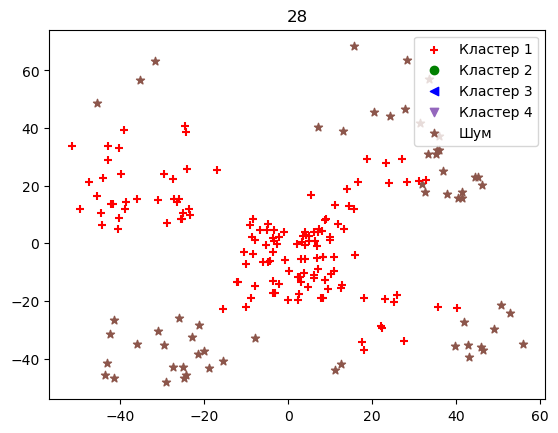

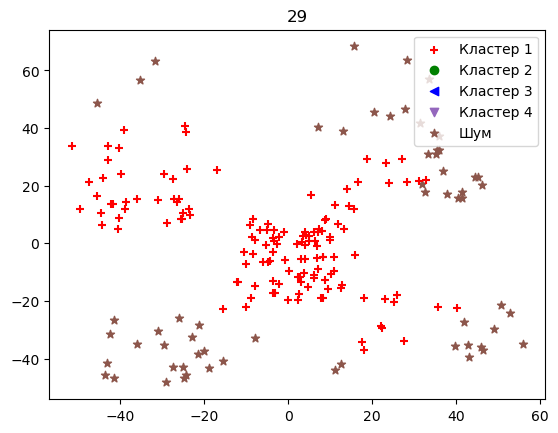

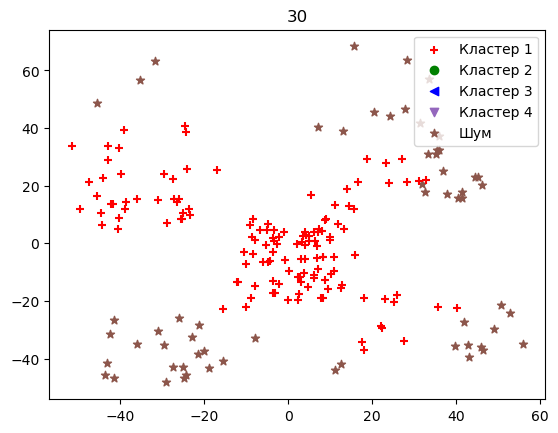

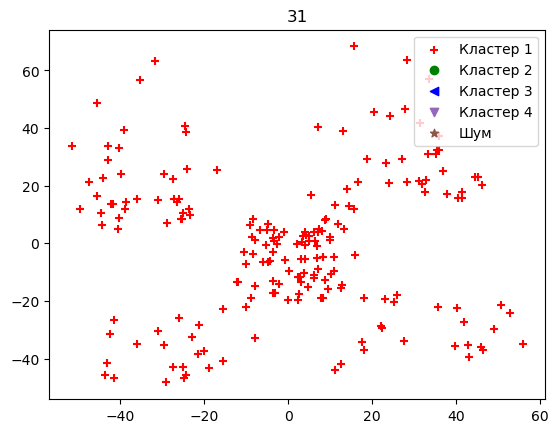

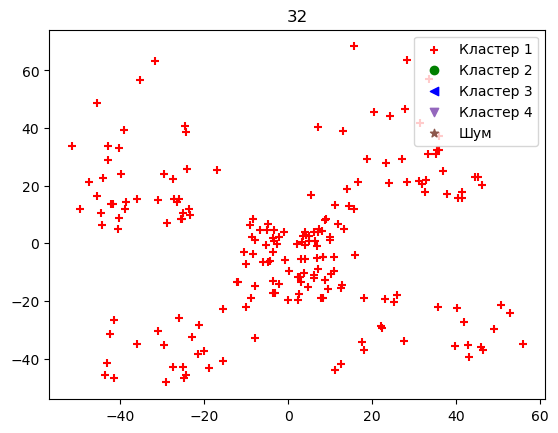

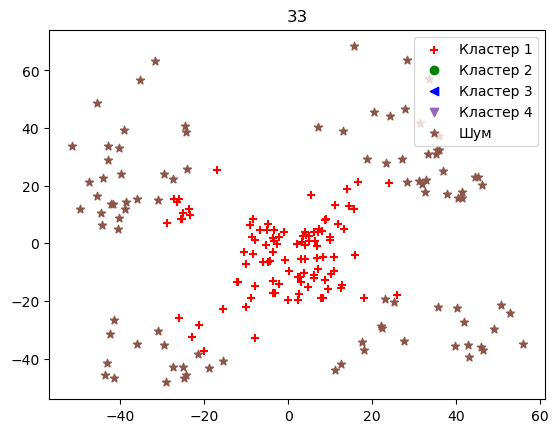

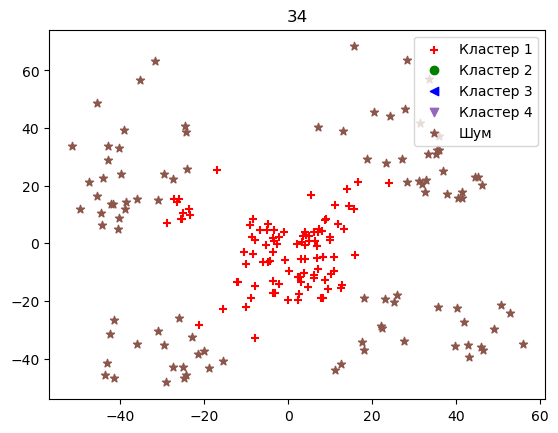

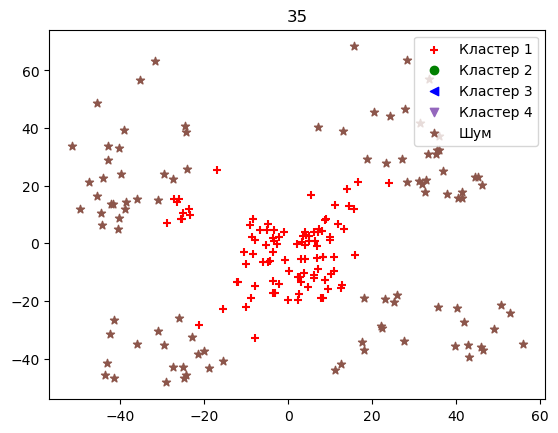

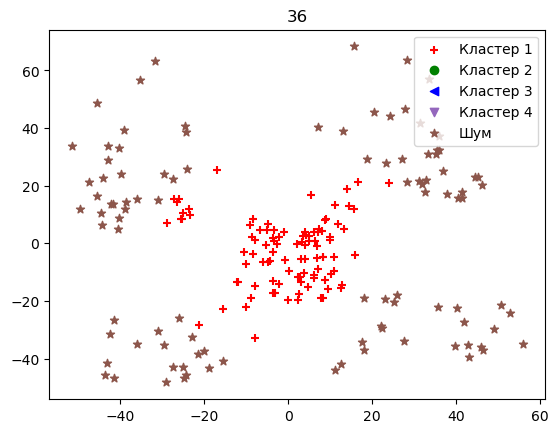

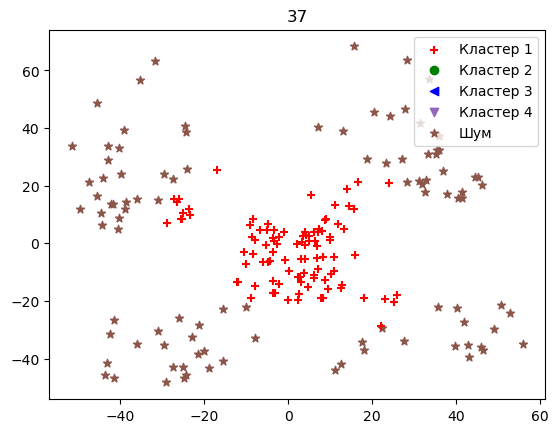

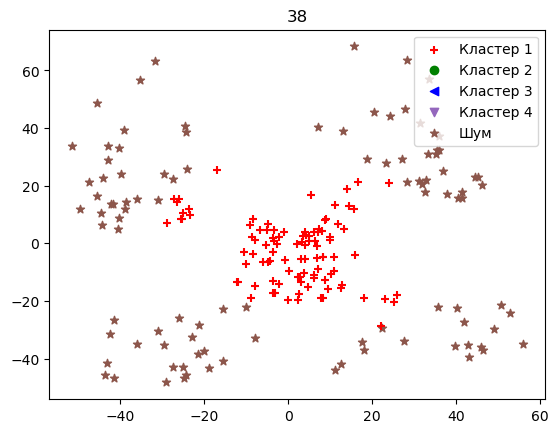

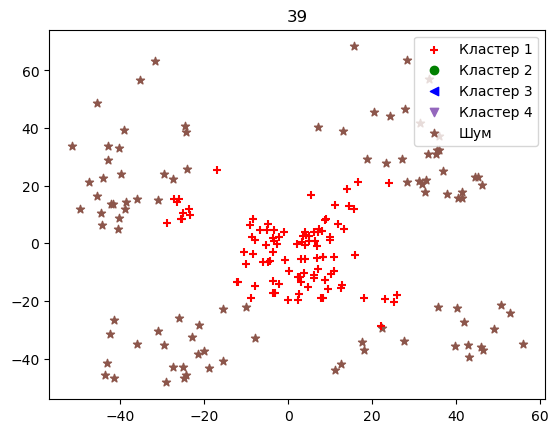

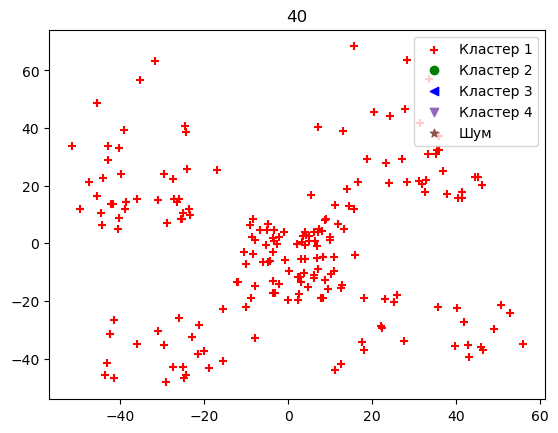

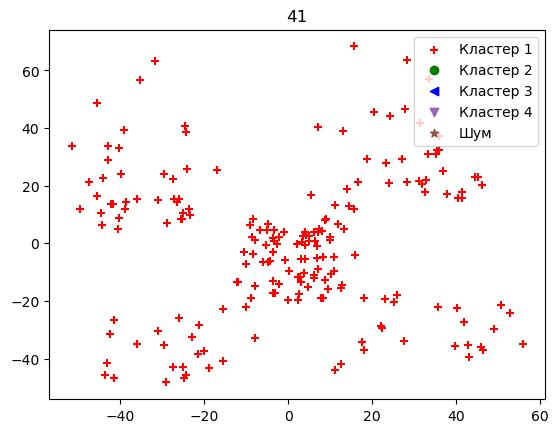

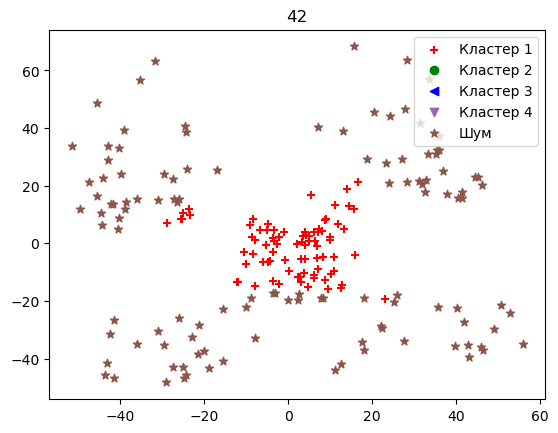

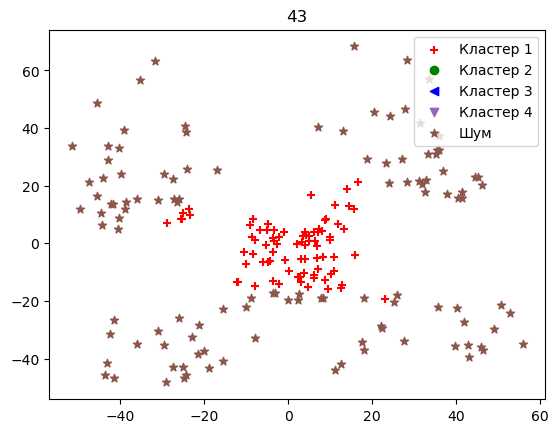

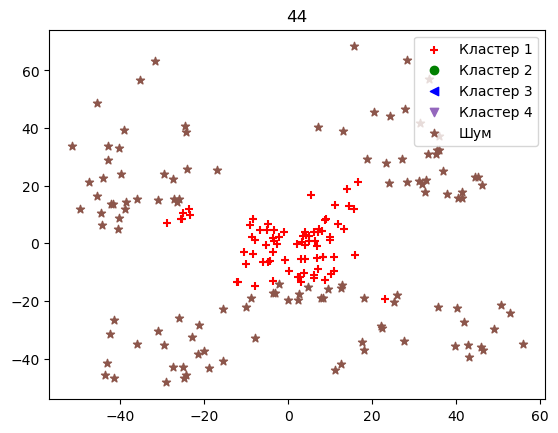

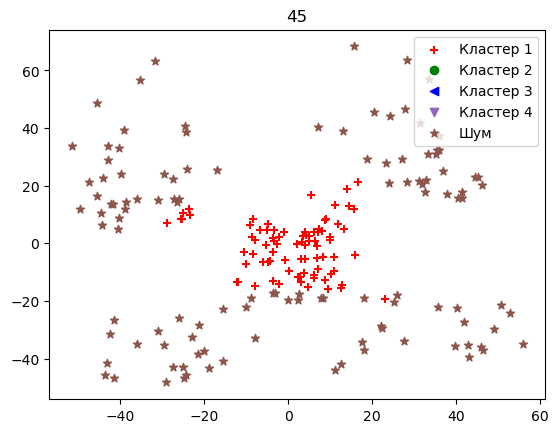

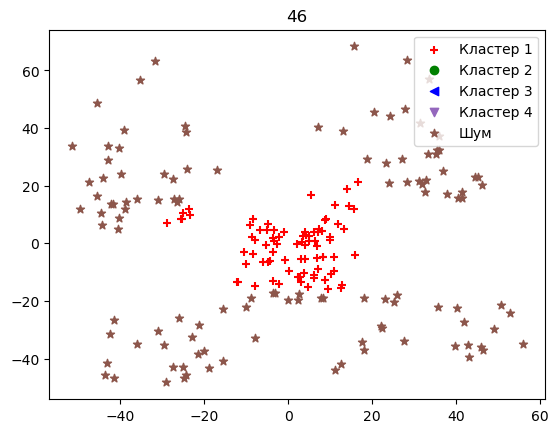

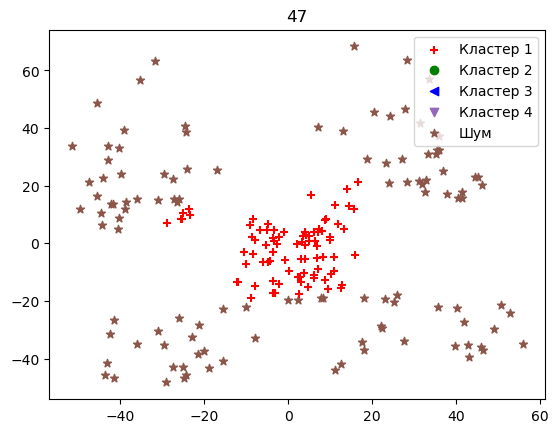

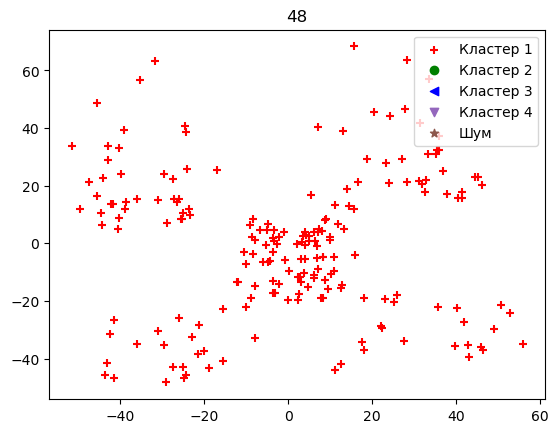

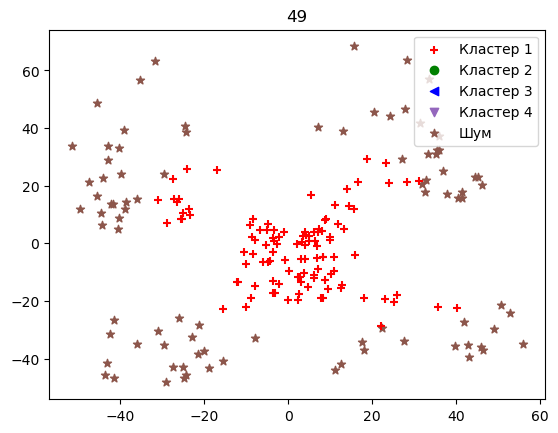

In [68]:
from sklearn.cluster import OPTICS
for samples in range(1,50):
    op = OPTICS(min_samples = samples, eps = 15).fit(encoded_data)

    for i in range(0, pca_2d.shape[0]):
        if op.labels_[i] == 0:
            c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
        elif op.labels_[i] == 1:
            c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
        elif op.labels_[i] == 2:
            c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker="<")
        elif op.labels_[i] == 3:
            c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#9467bd', marker="v")
        elif op.labels_[i] == -1:
            c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#8c564b', marker='*')
    plt.title(samples)
    plt.legend([c1, c2, c3, c4, c5], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4' , 'Шум'])
    plt.show()

А на оптиксе совсем не крут и вообще kmeans всё сделав за всех он выиграл